In [1]:
import numpy as np

### Financiamento ou aluguel por **X** anos qual dá o melhor valor presente?

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [4]:
pwd

'D:\\Users\\andre.ferreira\\Documents\\sandbox'

In [5]:
import pandas as pd

### IGPM mensal dados históricos de 1995 à 2018

https://www.sei.ba.gov.br/images/indicadores_especiais/xls/outros_indices/ind_outros_igp_m.xls

In [6]:
igpm = pd.read_excel('ind_outros_igp_m.xlsx') # IGPM

In [7]:
anos = igpm['Período'].values
print(anos)

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [8]:
igpm = igpm.drop(columns=['Período'])

In [9]:
igpm.head()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
0,0.92,1.39,1.12,2.10,0.58,2.46,1.82,2.20,-0.71,0.52,1.20,0.71
1,1.73,0.97,0.40,0.32,1.55,1.02,1.35,0.28,0.10,0.19,0.20,0.73
2,1.77,0.43,1.15,0.68,0.21,0.74,0.09,0.09,0.48,0.37,0.64,0.84
3,0.96,0.18,0.19,0.13,0.14,0.38,-0.17,-0.16,-0.08,0.08,-0.32,0.45
4,0.84,3.61,2.83,0.71,-0.29,0.36,1.55,1.56,1.45,1.70,2.39,1.81


In [10]:
igpm = igpm.values.ravel()

In [11]:
range_months = pd.date_range(start=str(anos[0]), end=str(anos[-1]+1), freq='M')

In [12]:
range_months[-13:]

DatetimeIndex(['2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [13]:
len(igpm), len(range_months)

(288, 288)

In [14]:
igpm = pd.Series(igpm, index=range_months)

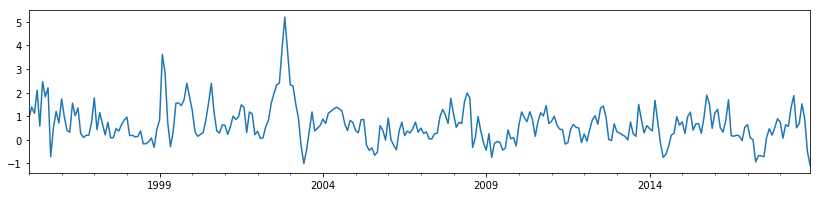

In [15]:
plt.figure(figsize=(14,3))
igpm.plot()

### Inflação média histórica 10 anos - mensal

Taxa de inflação media mensal 2009 a 2018.  

1. Considerando a economia pós crise de 2008. 
2. Considerando o pais mais adaptado ao plano real.  

In [16]:
anos[-10:]

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [17]:
# igpm médio últimos 10 anos
txigpm = (np.prod(igpm[-10*12:]*0.01+1.))**(1/(len(anos[-10:])*12))-1
txigpm

0.004562773733447711

### Inflação média histórica 10 anos - anual

In [18]:
(txigpm+1)**12-1

0.056148446824465736

### CDI mensal  - Cetip dados históricos 1995 à 2018

https://www.portalbrasil.net/indices_cdi.htm

In [19]:
cdi = pd.read_excel('cetip_cdi_mensal.xlsx', usecols=np.arange(1, 1+len(anos))) # CDI

In [20]:
cdi.head(12)

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,0.5833,1.0846,1.0549,0.9293,0.8397,0.5866,0.8853,0.8606,0.6582,1.0427,...,1.26,1.97,1.53,1.26,1.44,2.17,2.67,1.74,2.56,3.47
1,0.4649,0.8638,1.0014,0.8185,0.7826,0.4815,0.7415,0.8424,0.5925,0.8527,...,1.08,1.83,1.25,1.01,1.44,2.35,2.11,1.65,2.31,3.23
2,0.5315,1.0504,1.1605,1.0361,0.7599,0.5377,0.8083,0.9188,0.7569,0.9665,...,1.37,1.77,1.37,1.25,1.44,3.28,2.18,1.63,2.20,4.41
3,0.5175,0.7852,1.0544,0.9482,0.8154,0.6008,0.6999,0.8388,0.6639,0.8356,...,1.17,1.87,1.48,1.18,1.28,2.28,1.69,1.65,2.03,4.22
4,0.5175,0.9255,1.1074,0.9838,0.8582,0.5848,0.7324,0.9852,0.7500,0.7664,...,1.22,1.96,1.40,1.33,1.49,1.96,1.63,1.58,2.00,4.27
5,0.5175,0.8081,1.1605,1.0658,0.8174,0.5919,0.6385,0.9526,0.7908,0.7514,...,1.22,1.85,1.31,1.27,1.39,1.64,1.60,1.59,1.94,4.05
6,0.5422,0.7971,1.1074,1.1773,0.9404,0.7087,0.6754,0.9665,0.8592,0.7840,...,1.28,2.08,1.54,1.50,1.30,1.62,1.69,1.54,1.91,4.01
7,0.5669,0.8014,1.2135,1.1074,0.8595,0.6957,0.6865,1.0723,0.8863,0.6914,...,1.29,1.76,1.45,1.60,1.40,1.55,1.47,1.58,1.95,3.81
8,0.4681,0.6377,1.1074,1.1074,0.9005,0.6991,0.5371,0.9397,0.8445,0.6915,...,1.24,1.67,1.38,1.32,1.22,1.47,2.49,1.58,1.88,3.25
9,0.5430,0.6431,1.0474,1.1077,0.9448,0.8033,0.6072,0.8807,0.8056,0.6912,...,1.21,1.63,1.64,1.54,1.28,1.38,2.92,1.68,1.86,3.06


In [21]:
cdi.T.values.shape

(24, 12)

In [22]:
cdi.T[::-1].head()

,0,1,2,3,4,5,6,7,8,9,10,11
1995,3.47,3.23,4.41,4.22,4.27,4.05,4.01,3.81,3.25,3.06,2.84,2.73
1996,2.56,2.31,2.20,2.03,2.00,1.94,1.91,1.95,1.88,1.86,1.79,1.62
1997,1.74,1.65,1.63,1.65,1.58,1.59,1.54,1.58,1.58,1.68,2.99,2.92
1998,2.67,2.11,2.18,1.69,1.63,1.60,1.69,1.47,2.49,2.92,2.46,2.38
1999,2.17,2.35,3.28,2.28,1.96,1.64,1.62,1.55,1.47,1.38,1.37,1.58


In [23]:
cdi = pd.Series(cdi.T[::-1].values.ravel(), index=range_months)

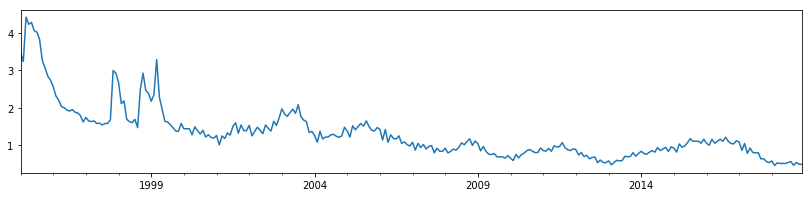

In [24]:
plt.figure(figsize=(14,3))
cdi.plot()

In [25]:
pwd

'D:\\Users\\andre.ferreira\\Documents\\sandbox'

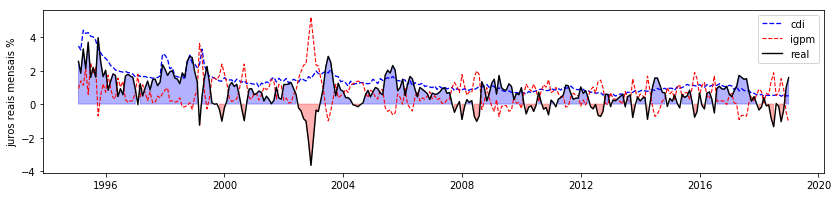

In [26]:
fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)
ax.plot(cdi, 'b--', lw=1.3, label='cdi')
ax.plot(igpm, 'r--', lw=1.1, label='igpm')
txfixa=cdi-igpm
ax.plot(txfixa, 'k', lw=1.4, label='real')
ax.fill_between(txfixa.index, txfixa.values, where=txfixa.values>0, color='blue', alpha=0.3)
ax.fill_between(txfixa.index, txfixa.values, where=txfixa.values<0, color='red', alpha=0.3)
ax.set_ylabel('juros reais mensais %')
plt.legend()

### Juros real médio histórico 10 anos renda fixa CDI

In [27]:
txfixa.values[:100]

array([ 2.55,  1.84,  3.29,  2.12,  3.69,  1.59,  2.19,  1.61,  3.96,
        2.54,  1.64,  2.02,  0.83,  1.34,  1.8 ,  1.71,  0.45,  0.92,
        0.56,  1.67,  1.78,  1.67,  1.59,  0.89, -0.03,  1.22,  0.48,
        0.97,  1.37,  0.85,  1.45,  1.49,  1.1 ,  1.31,  2.35,  2.08,
        1.71,  1.93,  1.99,  1.56,  1.49,  1.22,  1.86,  1.63,  2.57,
        2.84,  2.78,  1.93,  1.33, -1.26,  0.45,  1.57,  2.25,  1.28,
        0.07, -0.01,  0.02, -0.32, -1.02, -0.23,  0.2 ,  1.09,  1.29,
        1.05,  1.18,  0.54, -0.27, -0.99,  0.06,  0.9 ,  0.92,  0.56,
        0.64,  0.78,  0.69,  0.18,  0.47,  0.29,  0.02,  0.22,  1.01,
        0.36,  0.29,  1.17,  1.17,  1.19,  1.28,  0.92,  0.57, -0.23,
       -0.41, -0.87, -1.02, -2.23, -3.66, -2.02, -0.36, -0.45,  0.24,
        0.95])

Taxa de juros media mensal 2009 a 2018.  
1. Sendo mais pessimista 
2. Considerando a economia pós crise de 2008. 
3. Considerando o pais mais adaptado ao plano real.  

In [28]:
anos[-10:]

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [29]:
txcdireal = (np.prod(txfixa[-10*12:]*0.01+1.))**(1/(len(anos[-10:])*12))-1
txcdireal

0.0035170206098658063

### Anual

In [30]:
(txcdireal+1)**12-1

0.0430302769067239

### TR usada p/ corrigir financiamento

taxa de referência do banco central  

- corrige financiamentos, poupança entre outras coisas 

In [31]:
tr = pd.read_csv('TR-Historico-Anual.txt', header=None, names=['ano', 'tr'], delimiter='\t')

In [32]:
tr.set_index(tr.ano, inplace=True)
tr.drop(columns='ano', inplace=True)

Últimos 10 anos

In [33]:
np.prod(1+tr[:-10])-1

tr    0.082644
dtype: float64

Média Anual

In [34]:
np.prod(1+tr[:-10])**(1/10)-1

tr    0.007972
dtype: float64

Média Mensal últimos 10 anos

In [35]:
txtr = np.prod(1+tr[:-10])**(1/(10*12))-1
txtr

tr    0.000662
dtype: float64

### Pressuposições 

- Belo Horizonte - Bairro Sion
- IGPM aluguel 7% ano feb/2019
- Valorização do Imóvel == Depreciação devido ao desgaste natural com o tempo? Razoável?
- Condomínio será sempre pago.
- SELIC hoje 6.5% ano mas vamos calcular juros real médio histórico de uma renda fixa CDI

- Meu salário em reais R$ será corrigido da inflação? 3 cenários:
    1. Correção total
    2. Não haverá correção
    3. O mais provavel correção parcial.

Acho que não é relevante para análise.
    
- O valor do imóvel sofrerá:
    1. Desvalorização devido à deterioração natural com o tempo
    2. Valorização devido à demanda de novos compradores
    3. Desvalorização devido à inflação sobre o real R$
    
Extrapolando o que tem acontecido hoje em dia 2019, 1 e 2 tem se cancelado.  
Assim o único efeito sobre o valor do imóvel é desvalorização pela inflação. 
Mas imóvel históricamente sempre foi um bom investimento a não ser que ...  
uma nova crise global aconteça agora.


### Fluxo de Caixa : desconto valor presente

#### Compra:

- (-) dinheiro entrada
- (-) condomínio (descontado -)
- (-) mensal do financiamento (descontado -)
- (+) valor do imóvel (- desvalorizado pela inflação no final do período)


- Não adicionado
  - TR zero atualmente, mas normalmente > 0 adicionada à taxa de juros
   
#### Aluguel:  

- (-) condomínio(descontado -)
- (-) aluguel corrigido IGPM (descontado -)
- (+) dinheiro entrada 

In [36]:
aluguel = 1600
condominio = 800 # condominio + iptu etc 
valor_imovel = 600e3
x_anos = 20
igpm = (0.07+1)**(1./12)-1 # aumento mensal do aluguel por contrato hoje
# mas qual o histórico médio do Brasil? parece razoável esse valor na média
selic = (0.065+1)**(1./12)-1 # mensal
meses  = x_anos*12
entrada = 200e3
txjuros = (0.0967+1)**(1./12)-1 # CET convertida p/ mensal taxa de juros bradesco incluso seguros
# caixa economica financiamento algum problema estava dando 18.75%
# (0.1865+1)**(1./12)-1 = 0.01435 ao mês p/ 430k financiemento
#ipca = 

In [37]:
txjuros, selic

(0.007721799737121726, 0.00526169427684775)

#### Taxa juros efetiva inclui a TR

In [38]:
txjuros = float(txtr) + txjuros
txjuros

0.008383740206457713

#### Valor presente ou net present value (NPV)

$$ Vp = \sum_i^N{\frac{R_t}{(1+i)^t}} $$

Somatória dos iésimo fluxo de caixa descontado.  
A taxa $i$ de desconto é a inflação? ipca? igpm?  Não!  
- É a taxa real de juros de investimento risk-free! renda fixa cdi (por exemplo) - menos inflação

Vamos calcular então aproximadamente quanto é $i$ historicamente.

### Fluxo de caixa mensal - Comprar

**SAC significa Sistema de Amortização Constante**

Para calcular o valor da amortização basta dividir o valor financiado pelo número de meses. Suponha um financiamento de 110.500,00 em 360 meses à 0,72% ao mês:

amortização = 110500/360 = 306,94  
1a parcela = 306,94 + 0,72%x110500 = 1.102,54  
2a parcela = 306,94 + 0,72%x(110500-1x306,94) = 1.100,33  
3a parcela = 306,94 + 0,72%x(110500-2x306,94) = 1.098,12  

In [39]:
def sac(valor, meses, txjuros):
    """
    retorna parcelas do financiamento
    baseado no SAC    
    """
    amort = valor/meses
    return amort + txjuros*(valor-np.arange(meses)*amort)

In [40]:
def comprar(valor_imovel, entrada, meses, txjuros, condominio):
    return -sac(valor_imovel-entrada, meses, txjuros) - condominio*np.power(1+txigpm, np.arange(meses))

### Fluxo de caixa mensal - Alugar

In [41]:
def alugar(aluguel, meses, txigpm, condominio):
    return -((condominio+aluguel)*np.power(1+txigpm, np.arange(meses))) # condomino + etc + aluguel corrigido igpm 

In [42]:
meses, txjuros

(240, 0.008383740206457713)

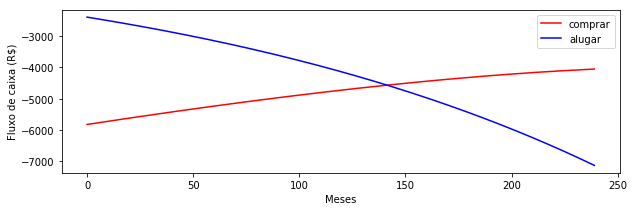

In [46]:
plt.figure(figsize=(10,3))
plt.plot(np.arange(meses), comprar(valor_imovel, entrada, meses, txjuros, condominio), 'r', label='comprar')
plt.plot(np.arange(meses), alugar(aluguel, meses, txigpm, condominio), 'b', label='alugar')
plt.ylabel('Fluxo de caixa (R$)')
plt.xlabel('Meses')
plt.legend()
#print('valor da operação futuro compra: ', np.sum(comprar())+valor_imovel)
#print('valor da operação futuro aluguel: ', np.sum(alugar())+entrada*(txcdireal+1)**meses)

### Valor Presente Alugar

In [47]:
npv_alugar = (np.sum(alugar(aluguel, meses, txigpm, condominio)/
       np.power(1+txcdireal, np.arange(meses)))+entrada)
npv_alugar

-454043.92116357037

### Valor Presente Comprar (com valorização do imóvel igual inflação e desgaste)

Apesar que de acordo com esses caras aqui o imóvel se valoriza real (descontando inflação IPCA) em média 1% ao ano nos últimos 36 anos.  
http://rexperts.com.br/valorizacao-dos-imoveis-brasil-fipe-zap/

- Estados unidos nos últimos 44 anos corrigindo de inflação de acordo com esse site aqui
http://www.jparsons.net/housingbubble/  
(pré-bolha imobiliária):
(175/150) = 1.16666 e `(175/150)**(1/(2014-1970))-1 = 0.0035` ou 0.35% ao ano
- Usando todos os dados concluiu que o valor do aluguel segue praticamente a mesma taxa de valorização dos imóveis

- Este outro site aqui https://michaelbluejay.com/house/appreciation.html recomenda considerar que o preço dos imóveis praticamente respeita a inflação, se não as pessoas não comprariam mais nada no longo prazo. Faz sentido com o 0.35% ano acima.


In [49]:
npv_comprar = (np.sum(comprar(valor_imovel, entrada, meses, txjuros, condominio)/
        np.power(1+txcdireal, np.arange(meses))))
npv_comprar+valor_imovel

-200170.28935194574

### Valor Presente Comprar (com desvalorização igual a inflação - 1%)

In [54]:
# considerando que a valorização dos EUA fosse aplicada aqui no Brasil 
# e traçando um paralelo com os dados históricos da FIPE
# ao inves de 53% ao final de 36 anos teríamos 13.4%
# ou seja uma diferença de 40%, eu acredito que caem esses preços pela inflação
# estão muito fora da reta
1.0035**36

1.1340326685697883

In [50]:
desvalor = txigpm-((0.01+1)**(1/12)-1)
desvalor

0.0037332356191015492

No final do period o valor dele é

In [51]:
valor_imovel*(1-desvalor)**meses

244514.95843507285

Trazendo esse dinheiro para o valor presente,   
considerando o valor dele hoje no risk-fre

In [52]:
(valor_imovel*(1-desvalor)**meses)/(1+txcdireal)**meses

105285.15187006831

o valor presente total é

In [53]:
npv_comprar+(valor_imovel*(1-desvalor)**meses)/(1+txcdireal)**meses

-694885.1374818775

Rent vs Buy

https://michaelbluejay.com/house/rentvsbuy.html

Outros custos de compra do imóvel

+ 3% a partr de 2014 em BH imposto de transmissão do imóvel - ITBI sobre o valor venal 
+ valor venal calculado por aqui https://www.credipronto.com.br/blog/como-calcular-o-valor-venal-de-um-imovel/
+ e aqui planta generica de Belo Horizonte http://portal6.pbh.gov.br/dom/Files/anexos%20iptu.pdf

+ interessante aqui http://www.vermelho.org.br/noticia/120003-1